# Exercise 6 - (E10.6)

The required modules:

In [1]:
import numpy as np

import matplotlib.pyplot as plt

The problem variables:

In [2]:
# Category I
cat_1 = list(map(np.array, [[1, 1], [-1, 2]]))
t1 = 1

# Category 2
cat_2 = list(map(np.array, [[0, -1], [-4, 1]]))
t2 = -1

# Data pre-processing
y_data = np.array([t1, t1, t2, t2])  # Real categories
x_data = np.empty((0, 2))
for cat in [cat_1, cat_2]:
    x_data = np.vstack((x_data, [*cat]))

print("Samples:\n", x_data)

Samples:
 [[ 1.  1.]
 [-1.  2.]
 [ 0. -1.]
 [-4.  1.]]


## Point 1

The network diagram is showed here:<br>
<br>


<div style="text-align:center;">
    <img src="https://i.ibb.co/tpMh7FY/network-diagram.png" width="50%" height="50%" />
</div>


## Point 2

The prediction function is implemented as usual:

In [3]:
# Layer output function
def predict(p: np.ndarray, W_fun: np.ndarray, B_fun: np.ndarray):
    return np.dot(W_fun, p.reshape(-1, 1)) + B_fun

The LMS algorithm without bias coded in the following cell is defined as follows:

$$
\begin{equation}
\textbf{W}_{new} = \textbf{W}_{old} + 2\alpha \cdot e \cdot \textbf{p}^T
\end{equation}
$$

Only one iteration is performed using a learning rate $\alpha$ of $0.1$, and taking the zero vector as initial guess:

In [4]:
# Initial guess
W = np.zeros((1, 2))  # Initial weight matrix

# Iterate the training procedure over training data
alpha = 0.1       # Learning rate
iterations = 1  # Number of training iterations
for _ in range(iterations):
    for i in range(len(x_data)):
        # Predict
        y_pred_step = np.squeeze(predict(x_data[i, :], W, 0))

        # Compute errors (target - prediction)
        error_step: np.ndarray = np.squeeze(y_data[i] - y_pred_step)
        print(i+1, "- Misclassification error:", error_step, "Predicted: ", y_pred_step, "Real: ", y_data[i])

        # Update weights and biases
        W += 2*alpha*(error_step*x_data[i, :])

print("\nUpdated W:\n", W)

1 - Misclassification error: 1.0 Predicted:  0.0 Real:  1
2 - Misclassification error: 0.8 Predicted:  0.2 Real:  1
3 - Misclassification error: -0.48 Predicted:  -0.52 Real:  -1
4 - Misclassification error: -1.456 Predicted:  0.45600000000000007 Real:  -1

Updated W:
 [[1.2048 0.3248]]


Utilizing the code from previous exercises we can plot the decision boundary after one iteration:

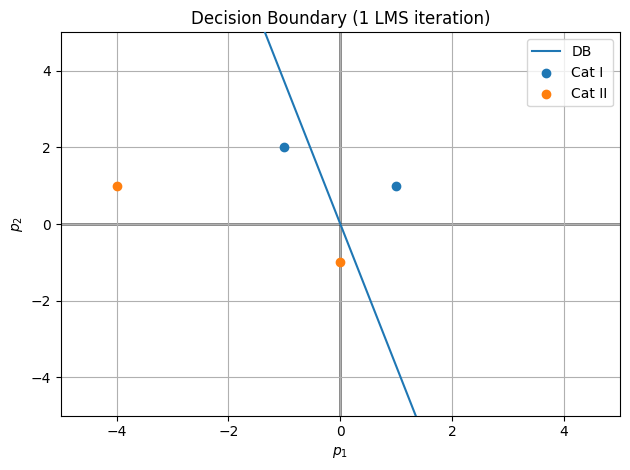

In [5]:
# Input space plot for each neuron
p1 = np.linspace(-5, 5, 1000)
_, ax = plt.subplots()
ax.grid(True)

# Neuron
p2 = -(W[0, 0]/W[0, 1]) * p1
ax.plot(p1, p2, label="DB", zorder=5)

# Scatter points
ax.scatter(*list(zip(*cat_1)), label="Cat I", zorder=5)
ax.scatter(*list(zip(*cat_2)), label="Cat II", zorder=5)

# Plot options
ax.set_xlabel(r"$p_1$")
ax.set_ylabel(r"$p_2$")

# Origin axis
ax.axhline(y=0, lw=2, color='k', alpha=0.5, zorder=0)
ax.axvline(x=0, lw=2, color='k', alpha=0.5, zorder=0)

# Set the limits of the plot
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

# More options
ax.legend()
plt.title("Decision Boundary (1 LMS iteration)")
plt.tight_layout()
plt.show()

It is therefore evident that one iteration is not enough to correctly classify all the samples.

## Point 3

The optimal weights can be found as:

$$\begin{equation}
\textbf{x}^* = \textbf{R}^{-1}\textbf{h}
\end{equation}$$

and:

$$\begin{align}
\textbf{h} &= E\left[\textbf{y}^T \textbf{x}\right] \\
\textbf{R} &= E\left[\textbf{x}^T \textbf{x}\right]
\end{align}$$

where $\textbf{y}$ (shape: $n_{samples}$ x $1$) is the vector of targets, and $\textbf{x}$ (shape: $n_{samples}$ x $2$) the matrix containing the samples.

Assuming equal probability of outcomes, $\textbf{h}$ and $\textbf{R}$ can be computed as:

$$
\begin{equation}
\textbf{h} = \frac{1}{2} \textbf{y}^T \textbf{x} \, , \;\;\;\; \textbf{R} = \frac{1}{2} \textbf{x}^T \textbf{x}
\end{equation}
$$

Producing the following result for $\textbf{x}^*$:

In [6]:
# Compute R
R = 0.5 * np.dot(x_data.transpose(), x_data)
print("R matrix:\n", R)

# Compute h
h = 0.5 * np.dot(y_data.reshape(1, -1), x_data).transpose()
print("\nh vector: \n", h)

# Optimal weights
x_star = np.linalg.solve(R, h).transpose()
print("\nOptimal weights x*: \n", x_star)

R matrix:
 [[ 9.  -2.5]
 [-2.5  3.5]]

h vector: 
 [[2. ]
 [1.5]]

Optimal weights x*: 
 [[0.42574257 0.73267327]]


## Point 4

The plot of the optimal decision boundary without bias:

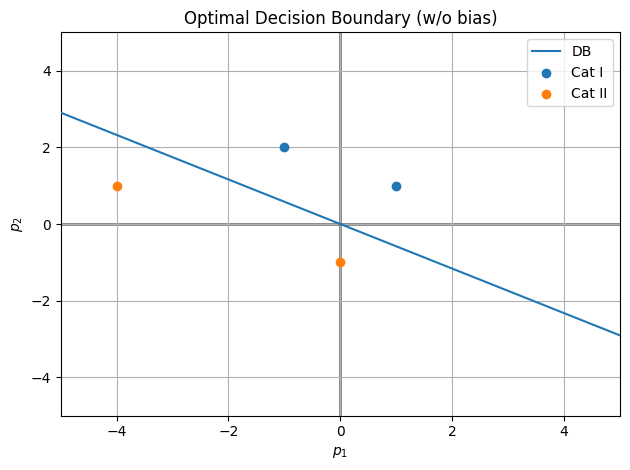

In [7]:
# Input space plot for each neuron
p1 = np.linspace(-5, 5, 1000)
_, ax = plt.subplots()
ax.grid(True)

# Neuron
p2 = -(x_star[0, 0]/x_star[0, 1]) * p1
ax.plot(p1, p2, label="DB", zorder=5)

# Scatter points
ax.scatter(*list(zip(*cat_1)), label="Cat I", zorder=5)
ax.scatter(*list(zip(*cat_2)), label="Cat II", zorder=5)

# Plot options
ax.set_xlabel(r"$p_1$")
ax.set_ylabel(r"$p_2$")

# Origin axis
ax.axhline(y=0, lw=2, color='k', alpha=0.5, zorder=0)
ax.axvline(x=0, lw=2, color='k', alpha=0.5, zorder=0)

# Set the limits of the plot
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

# More options
ax.legend()
plt.title("Optimal Decision Boundary (w/o bias)")
plt.tight_layout()
plt.show()

## Point 5

Including bias in the model could potentially improve the boundary by minimizing the least square error compared to a model without bias. This is what happens in our case, to show how the result is improved, let's start by computing the optimal weights and bias, in this case we define $\textbf{z}$ as:

$$
\begin{equation}
\textbf{z} = \begin{bmatrix}
\textbf{x} & \textbf{I}
\end{bmatrix}
\end{equation}
$$

Therefore, considering 1s as inputs for the bias. The required quantities to solve for $\textbf{x}^*$ are retrieved as:

$$
\begin{equation}
\textbf{h} = \frac{1}{2} \textbf{y}^T \textbf{z} \, , \;\;\;\; \textbf{R} = \frac{1}{2} \textbf{z}^T \textbf{z}
\end{equation}
$$

Performing these calculations leads to the following results:

In [8]:
# Define required quantity
z = np.hstack((x_data, np.ones(shape=(x_data.shape[0], 1))))

# Compute R
R = 0.5 * np.dot(z.transpose(), z)
print("R matrix:\n", R)

# Compute h
h = 0.5 * np.dot(y_data.reshape(1, -1), z).transpose()
print("\nh vector: \n", h)

# Optimal weights
x_star = np.linalg.solve(R, h).transpose()
print("\nOptimal weights and bias: \n", x_star)

R matrix:
 [[ 9.  -2.5 -2. ]
 [-2.5  3.5  1.5]
 [-2.   1.5  2. ]]

h vector: 
 [[2. ]
 [1.5]
 [0. ]]

Optimal weights and bias: 
 [[ 0.4  0.8 -0.2]]


Finally, by plotting the optimal decision boundary with bias, we can see how the spacing between each sample and the boundary is maximized (minimum LMS), and the straght line does not pass through the origin anymore:

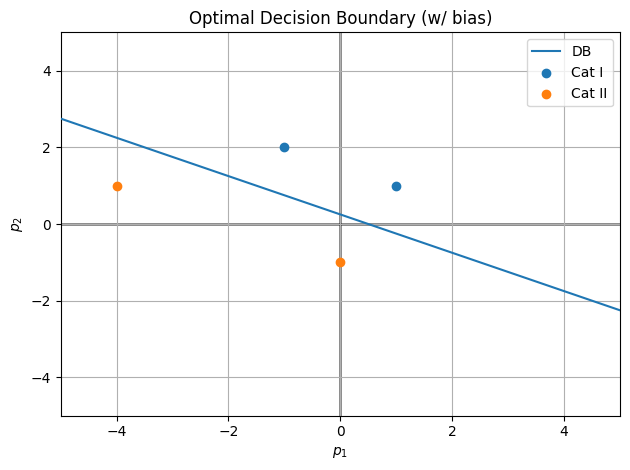

In [9]:
# Input space plot for each neuron
p1 = np.linspace(-5, 5, 1000)
_, ax = plt.subplots()
ax.grid(True)

# Neuron
p2 = -(1/x_star[0, 1]) * (x_star[0, 0]*p1 + x_star[0, 2])
ax.plot(p1, p2, label="DB", zorder=5)

# Scatter points
ax.scatter(*list(zip(*cat_1)), label="Cat I", zorder=5)
ax.scatter(*list(zip(*cat_2)), label="Cat II", zorder=5)

# Plot options
ax.set_xlabel(r"$p_1$")
ax.set_ylabel(r"$p_2$")

# Origin axis
ax.axhline(y=0, lw=2, color='k', alpha=0.5, zorder=0)
ax.axvline(x=0, lw=2, color='k', alpha=0.5, zorder=0)

# Set the limits of the plot
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

# More options
ax.legend()
plt.title("Optimal Decision Boundary (w/ bias)")
plt.tight_layout()
plt.show()